In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

df=pd.read_csv('/content/missingvalues_handeled.csv')
df.columns

Index(['id', 'last_scraped', 'name', 'description', 'host_name', 'host_since',
       'host_location', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price_in_dollar', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_revie

In [ ]:
cols = ['host_response_rate', 'host_acceptance_rate',
        'calculated_host_listings_count', 'price_in_dollar',
        'reviews_per_month', 'host_total_listings_count']


columns_to_drop = ['number_of_reviews_ltm', 'minimum_minimum_nights', 'maximum_minimum_nights',
                   'maximum_maximum_nights', 'minimum_maximum_nights', 'minimum_nights_avg_ntm',
                   'maximum_nights_avg_ntm']
df.drop(columns=columns_to_drop, inplace=True)

Detection of outliers by ploting box plot

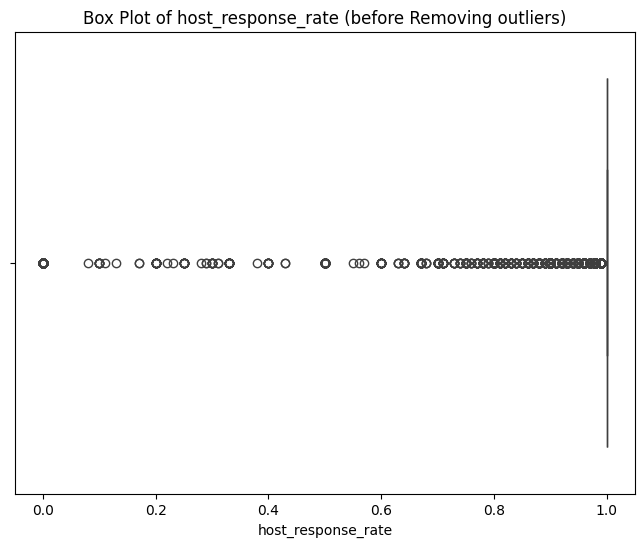

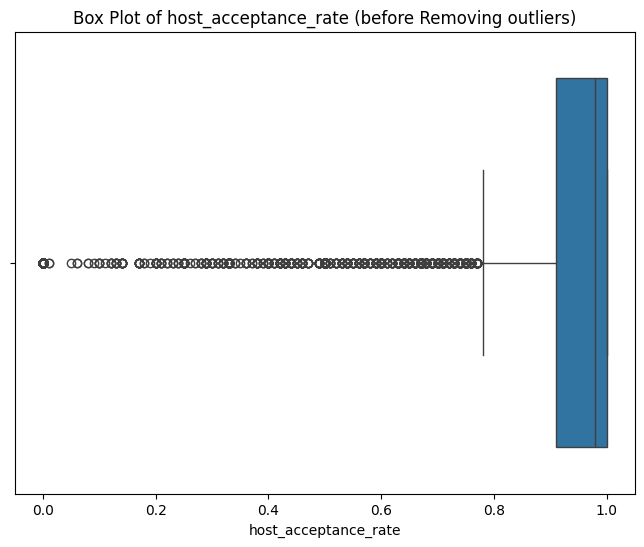

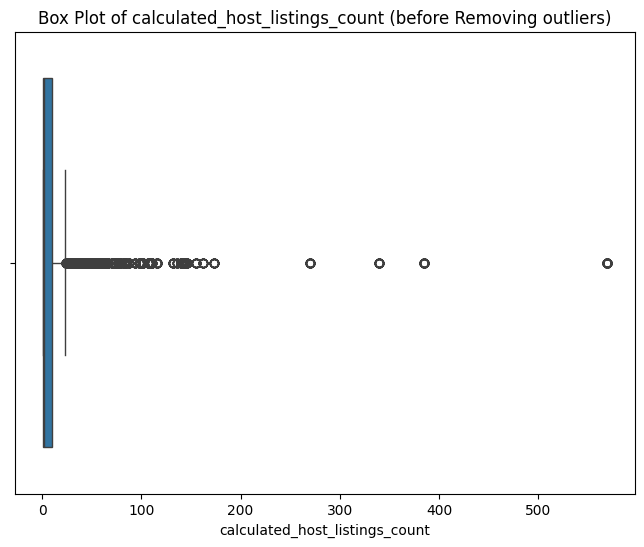

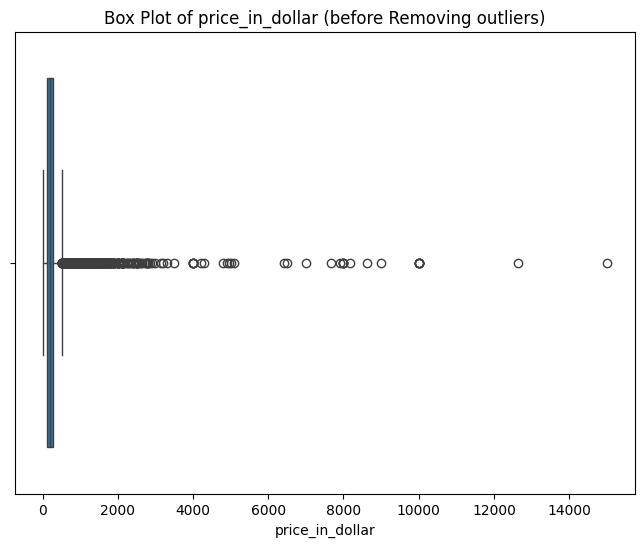

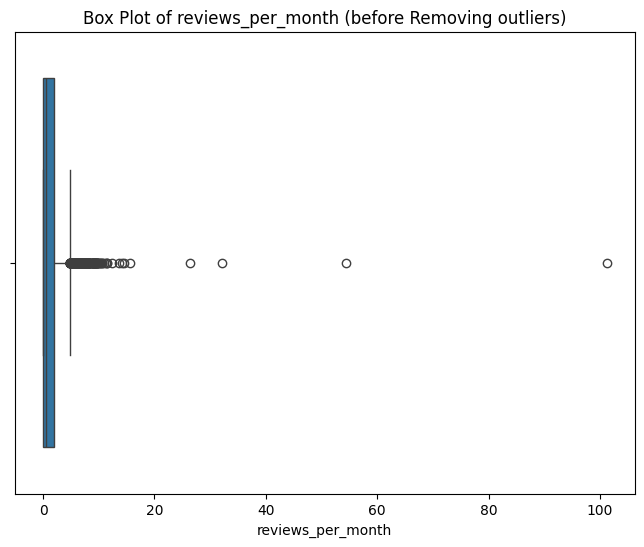

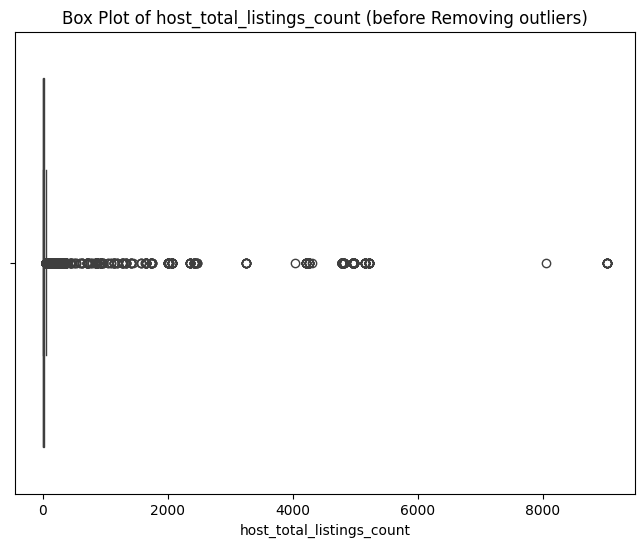

(9998, 55)

In [ ]:
for col in cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col} (before Removing outliers)')
    plt.show()
df.shape

As number of outliers is to large ...we need to replace it rather than removing

In [ ]:
#replacing outliers (capping)
for col in cols:
    # Calculate Q1 and Q3
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with Q1 or Q3
    df[col] = df[col].apply(lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x))



ploting box plot after replacing outliers

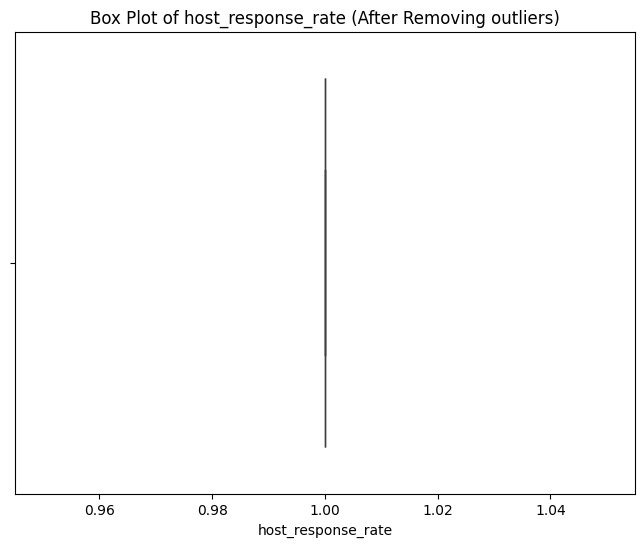

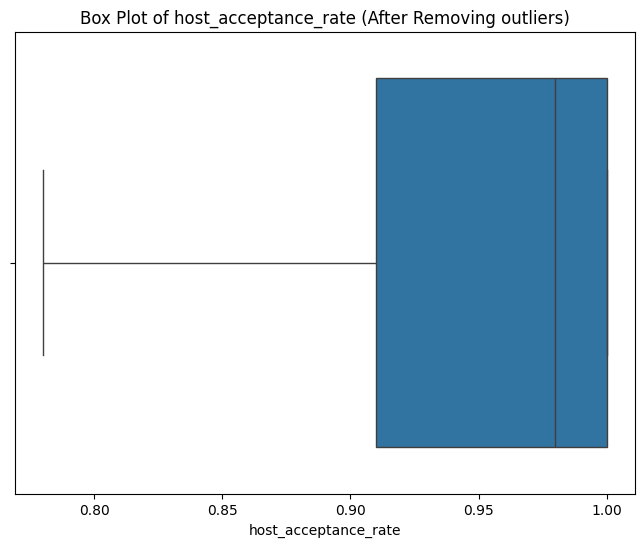

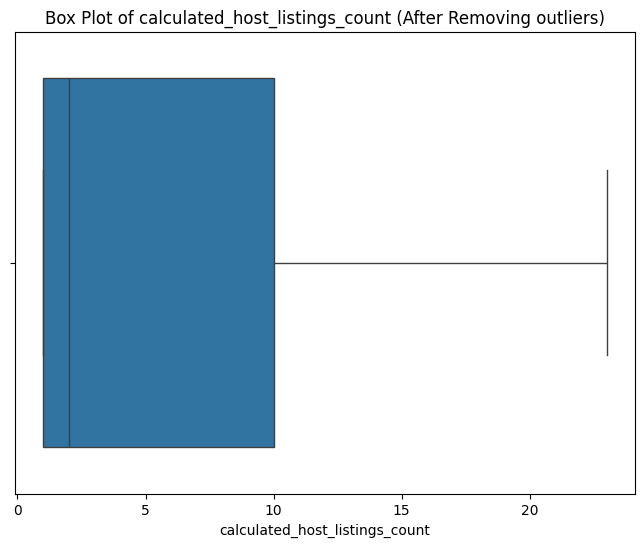

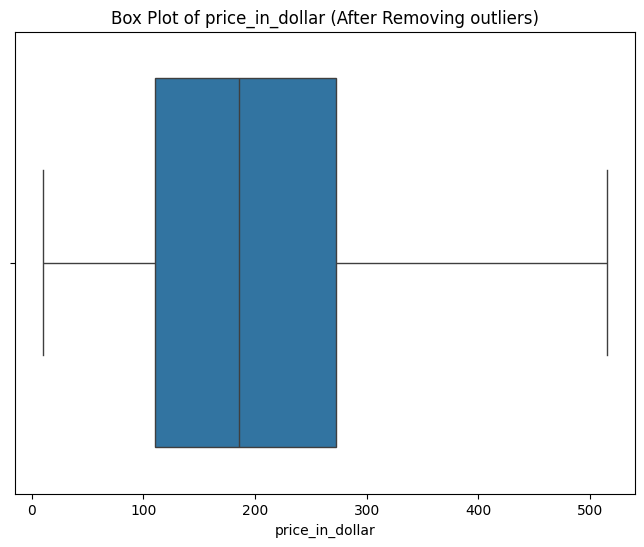

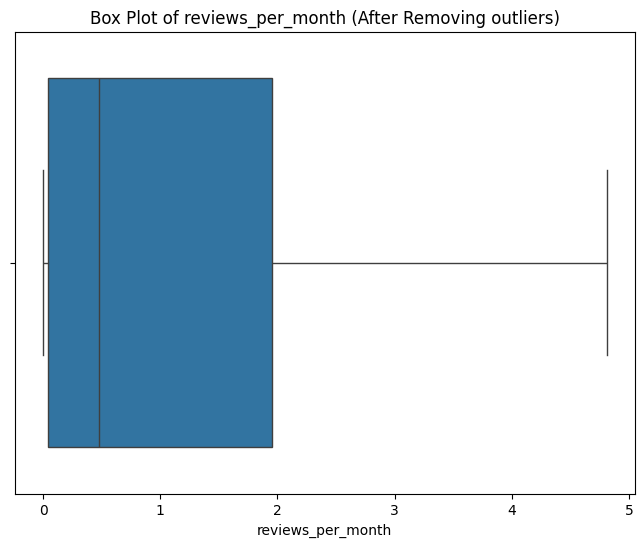

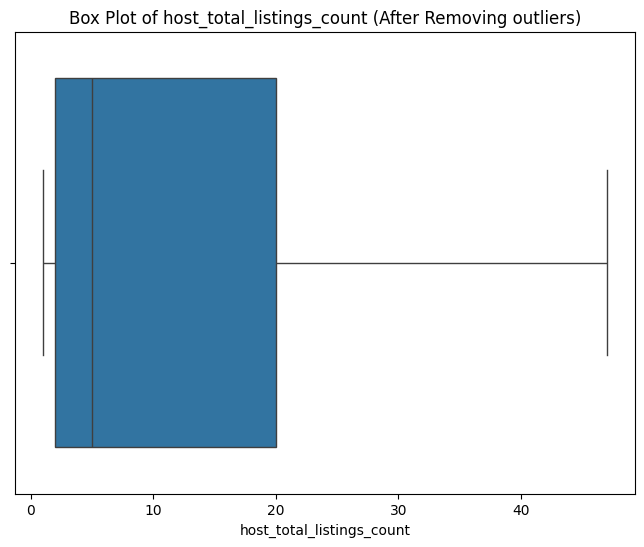

(9998, 55)

In [ ]:
for col in cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col} (After Removing outliers)')
    plt.show()
df.shape

In [ ]:
df.to_csv('/content/outlier_handled.csv', index=False)